# Applying Machine Learning and Search Methods for S&P500 Stock Portfolio Forecasting and Optimization

 Project developed by: **Eduardo Passos** [202205630](https://sigarra.up.pt/fcup/pt/fest_geral.cursos_list?pv_num_unico=202205630), **Pedro Fernandes** [202208347](https://sigarra.up.pt/fcup/pt/fest_geral.cursos_list?pv_num_unico=202208347) and **Rafael Pacheco** [202206258](https://sigarra.up.pt/fcup/pt/fest_geral.cursos_list?pv_num_unico=202206258)

### Index {#index} #############################################
1. [Project Introduction](#intro)
2. [Introduction to Stock Concepts](#intro2)
3. [Data Extraction and Collection](#data)

    3.1 [Visualization and Formatting](#vis)
4. [Exploratory Data Analysis](#eda)

5. 

? [Conclusion](#conclusion)
? [References](#ref)

# Project Introduction and Motivation {#intro}

This project encompasses the creation of a well suited investment strategy based on the S&P500 stock dataset.
The highlights of the group's development process are detailed throughout this report. All of the specific files utilized during the project's development can be found inside the submitted folder.

In order to predict stock behaviour, we employed:

 - `Deep Learning`: Long Short-Term Memory (LSTM)
 - ...

To optimize portfolio selection, we implemented:

 - `Search Methods`: Monte Carlo Tree Search (MCTS)
 - ...

The stock market is highly volatile and unpredictable, making stock price prediction nearly luck based.

In order to create strategies that allow for investors to efficiently obtain risk-adjusted returns, we can use **S&P500 data** to get a better understanding of how the stock market may behave, based on previously collected data and statistics.

It's important to mention that it doesn't always follow a guaranteed predictable, mathematical pattern. It is influenced by many real-world factors, independent to a company's growth and significance.

# Introduction to Stock Concepts

In case the reader is unfamiliar with stocks and investing, we decided to briefly explain key concepts used throughout this report.

The S&P500 is a stock market index that tracks the performance of 500 of the largest publicly traded companies in the United States. As per requested in the project statement, we used this dataset's information, from 2010 to 2023, in order to predict the stock behaviour of those companies during January 20204.

### **What are stocks, and why are they an investment?**
Stocks (or shares) represent ownership in a company. Investors buy stocks to gain a portion of a company's profits, or to benefit from an increase in the stock's market value.

#### **What are tickers?**
A ticker is a unique symbol assigned to a company's stock, essentially an identifier for each company, in order to facilitate stock tracking:

 - `AAPL`: Apple Inc.
 - `GOOG`: Alphabet Inc. (or, simply put, Google)
 
### **What are opening and closing prices?**
The opening price is the price at which a stock begins trading, when the market opens for the day. 
The closing price is the actual last transaction price on that day, for that specific stock.

We will be using daily windows in order to predict these prices.

### **What are windows, and how are they helpful during prediction?**
In time series analysis, a "window" refers to a segment of the data used for analysis or prediction. 
By using time series analysis, we aim to identify patterns, trends, and seasonal effects in the data.

### **Most importantly, how can I gain or lose money by investing?**

A positive return indicates profit, while a negative return signifies a loss. 
These are typically expressed as a percentage of the original investment. 

Imagine the investor purchases stock at 100:

 - Stock price increases from 100 to 110 -> the return is 10% -> <span style="color:green">Profit!</span>

 - Stock price decreases from 100 to 90 -> the return is -10% -> <span style="color:red">Loss!</span>

Market fluctuations dictate stock prices, which in return represent profit or loss for investors.

# Data Extraction and Collection

In order to extract the 2010-2023 section of the dataset, we used the `yfinance` module. 

[Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) is also accessed to download a table containing a list of S&P500 tickers.

The functions below document the extraction and collection process.

In [66]:
import pandas as pd
import yfinance as yf
import os

In [67]:
# Step 1: Get the list of S&P 500 companies
def get_sp500_tickers():
    # Download the table from Wikipedia
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    table = pd.read_html(url)[0]
    tickers = table['Symbol'].tolist()
    
    # Remove any invalid ticker symbols if necessary
    tickers = [ticker.replace('.', '-') for ticker in tickers]  # For Yahoo Finance compatibility
    return tickers

In [68]:
# Step 2: Download data for each stock
def download_sp500_data(tickers, start_date="2010-01-01", end_date="2024-12-31", group_by="ticker"):
    data = {}
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")
        try:
            data[ticker] = yf.download(ticker, start=start_date, end=end_date)
        except Exception as e:
            print(f"Error downloading {ticker}: {e}")
    return data

In [69]:
# Step 3: Save or analyze the data

raw_directory = "raw_csvs"  # Specify the directory where you want to save the files

def save_data_to_csv(data):
    # Create the directory if it doesn't exist
    if not os.path.exists(raw_directory):
        os.makedirs(raw_directory)
    
    for ticker, df in data.items():
        if not df.empty:
            # Save the file in the specified directory
            file_path = os.path.join(raw_directory, f"{ticker}.csv")
            df.to_csv(file_path)
            print(f"Data for {ticker} saved to {file_path}.")
        else:
            print(f"No data for {ticker}.")


Uncomment to run. (dps muda se tava farto de tirar e meter acentos)

```py 

tickers = get_sp500_tickers()
sp500_data = download_sp500_data(tickers)
save_data_to_csv(sp500_data)

```

## Visualization and Formatting


Let's visualize the data we extracted. We'll use the Tesla stocks, `TSLA`, for showcasing formats and changes, since each csv was extracted equally.

In [70]:
df = pd.read_csv('./raw_csvs/TSLA.csv')
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-06-29 00:00:00+00:00,1.5926669836044312,1.5926669836044312,1.6666669845581055,1.1693329811096191,1.2666670083999634,281494500
3,2010-06-30 00:00:00+00:00,1.5886670351028442,1.5886670351028442,2.0280001163482666,1.553333044052124,1.7193330526351929,257806500
4,2010-07-01 00:00:00+00:00,1.4639999866485596,1.4639999866485596,1.7280000448226929,1.3513330221176147,1.6666669845581055,123282000


In [71]:
df.columns

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [72]:
df.dtypes

Price        object
Adj Close    object
Close        object
High         object
Low          object
Open         object
Volume       object
dtype: object

The dataset is presented in an unusual format. In order to facilitate analysis and training, we will be converting it into something more familiar, taking into consideration that:
 - Ticker is consistent for each csv;
 - `Price` can be overwritten as `Date`;
 - Removing NaN from column 1 will finish the process;

The function below applies this process to any given dataset from the `raw_csvs` folder, transforming it into a clean, working dataframe.

This is done by opening each `csv` file and converting it to a dataframe using `pandas`. Then, the irrelevant rows (0 contains tickers, and 1 contains NaN) are dropped. The `Price` column is in place of `Date`, therefore, `Price` is changed to `Date`. Finally, the date + time format is modified to `YYYY-MM-DD` format, making sure we only keep relevant information. We also transform each string column into `float64`, except for `Volume`, which is always an Integer.


Optionally, we can keep only the `Close` column for each stock, which is the closing price, and ultimatelly our target for prediction. If the argument **onlyClose** is kept as `False`, then all of the clean columns are kept.

In [80]:
def process_csv(file, onlyClose=False):
    df = pd.read_csv(file)
    
    # Drop rows with index 0 and 1, weird download format
    df = df.drop([0, 1])
    df.reset_index(drop=True, inplace=True)
    
    df.rename(columns={'Price': 'Date', 'Adj Close': 'AdjClose'}, inplace=True) 
    
    # Get only date
    df['Date'] = pd.to_datetime(df['Date']).dt.date 

    # Convert strings to float and int
    for col in ["AdjClose", "Close", "Open", "High", "Low", "Volume"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    if onlyClose:
        # Keeps only the 'Date' and 'Close' columns
        df = df[['Date', 'Close']] 
 
    # Set 'Date' as the index 
    df.set_index('Date', inplace=True)
    
    # Reset the index so that 'Date' is no longer the index
    df.reset_index(inplace=True)

    # Check the current columns to see what needs to be dropped (debug)
    #print(df.columns)

    return df

In [81]:
df_clean = process_csv('./raw_csvs/TSLA.csv')
df_clean.head()

,Date,AdjClose,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [82]:
df_clean.columns

Index(['Date', 'AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [83]:
df_clean.dtypes

Date         object
AdjClose    float64
Close       float64
High        float64
Low         float64
Open        float64
Volume        int64
dtype: object

In order to **automate this process**, we can get a list of tickers and save clear data to the directory below.

In [84]:
tickers = get_sp500_tickers()
tickers.sort()

In [85]:
clean_directory = 'clean_csvs'
close_directory = 'clean_close_csvs'

def save_cleaned_data(tickers, raw_dir, clean_dir, onlyClose=False):
    if not os.path.exists(clean_dir):
        os.makedirs(clean_dir)
    
    for ticker in tickers:
        raw_file_path = os.path.join(raw_dir, f"{ticker}.csv")
        #print(raw_file_path)
        if os.path.exists(raw_file_path):
            # Process the CSV file
            #print(f"Processing {ticker}...")
            df = process_csv(raw_file_path, onlyClose)
            
            if not df.empty:
                # Save the processed DataFrame to the clean directory
                clean_file_path = os.path.join(clean_dir, f"{ticker}.csv")
                df.to_csv(clean_file_path, index=False)
                #print(f"Data for {ticker} saved to {clean_file_path}.")
            else:
                #print(f"No valid data for {ticker}. Skipping...")
                pass
        else:
            #print(f"File for {ticker} not found in {raw_dir}. Skipping...")
            pass

By running this line of code, every `csv` file in the `raw_csv` directory will be read and its new, formatted contents will be written to a new `csv` file in the `clean_csv` and `clean_csv_close` folders.

```py
save_cleaned_data(tickers, raw_directory, clean_directory)
save_cleaned_data(tickers, raw_directory, close_directory, True)
```

# Exploratory Data Analysis 

## GSPC Index Analysis

To efficiently analyze the data, we will download the full `GSPC` index for the S&P 500.

The GSPC index represents a broad market indicator, aggregating the price movements of a diverse set of stocks, and provides a comprehensive overview of market trends. It serves as a useful benchmark for understanding the **general performance of the market**.

By using the `yfinance` module, we can easily download the GSPC data and then apply the previously mentioned cleanup steps for analysis.

In [151]:
start = '2010-01-04'

# Open interval, contains only 2023-12-29
end = '2023-12-30'

df_gspc = yf.download('^GSPC', start=start, end=end)

df_gspc.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2010-01-04,1132.989990,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [147]:
df_gspc.to_csv('GSPC.csv')

df_gspc = process_csv('GSPC.csv')

In [148]:
df_gspc.head()

,Date,AdjClose,Close,High,Low,Open,Volume
0,2010-01-04,1132.989990,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
1,2010-01-05,1136.520020,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2,2010-01-06,1137.140015,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
3,2010-01-07,1141.689941,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
4,2010-01-08,1144.979980,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In order to visualize the general market behaviour, we can plot this dataframe's closing prices for any time interval we wish:

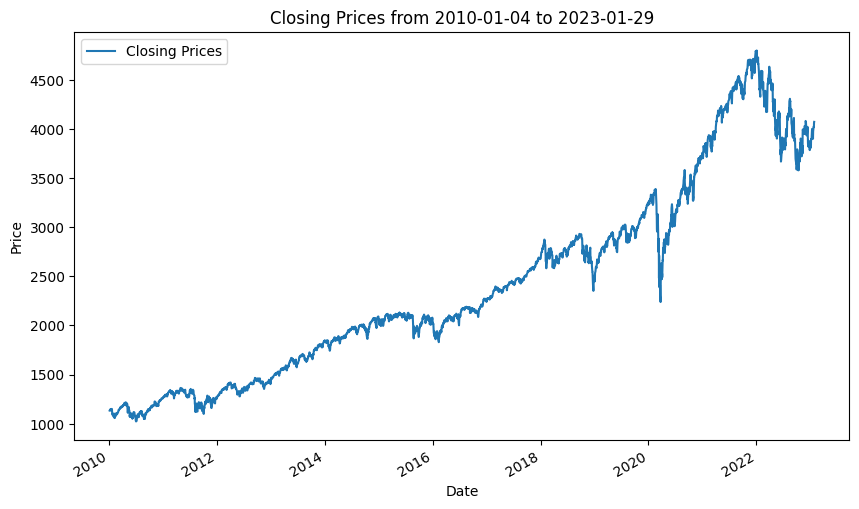

In [159]:
import matplotlib.pyplot as plt

start_date = '2010-01-04'
end_date = '2023-01-29'

# Define section you want to see
df_gspc_interval = df_gspc[(df_gspc.index >= start_date) & (df_gspc.index <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10, 6))

# Plot the 'Close' prices from the filtered data
plt.plot(df_gspc_interval.index, df_gspc_interval['Close'], label='Closing Prices')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Closing Prices from {start_date} to {end_date}')
plt.legend()

# Format x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

In [158]:
df_gspc.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03
mean,2535.092035,2535.092035,2548.398393,2519.736800,2534.540220,3.941032e+09
std,1070.516829,1070.516829,1076.721030,1063.824066,1070.377836,9.621445e+08
min,1022.580017,1022.580017,1032.949951,1010.909973,1027.650024,1.025000e+09
25%,1650.479980,1650.479980,1656.674957,1639.840027,1649.520020,3.362412e+09
50%,2264.484985,2264.484985,2271.895020,2258.309937,2267.295044,3.779375e+09
75%,3274.374939,3274.374939,3285.877441,3251.767578,3275.787415,4.315865e+09
max,4796.560059,4796.560059,4818.620117,4780.979980,4804.509766,1.061781e+10


Now that our data is presented in a familiar format, we can begin to analyze the `csv` contents.

## Preprocessing and Cleanup

### Missing Values

The first step is to verify if any of them possess any NaN values. If so, those tickers will be identified so that the faulty `csvs` are not passed into the models.

In [87]:
has_nan = [] 

# Iterate over each file 
for ticker in tickers:
    file_path = os.path.join(clean_directory, f"{ticker}.csv")

    # Temporarily transform into dataframe
    df = pd.read_csv(file_path)

    # Returns True if df has at least one NaN
    if df.isna().any().any(): has_nan.append(ticker)

len(has_nan)


0

### Inconsistent Presence in the S&P500

There are no NaN values in any of our csv files. However, due to the nature of the S&P500, there could be companies that are not consistently part of the dataset, from `2010-01-04` up until `2023-12-29`.

We know that Apple, `AAPL`, has never left the S&P500 since its inclusion in 1982. This means that if we crop the csv file to the specified date range, we can determine the number of rows a perfect training dataset should have:

In [127]:
df = pd.read_csv('./clean_csvs/AAPL.csv')

df.head()

,Date,AdjClose,Close,High,Low,Open,Volume
0,2010-01-04,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.458559,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.355826,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.344076,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [128]:
len(df)

3754

If we use all available days, we would have 3754 rows. However, if we use only the interval mentioned in the project statement, we should have as many rows as the GSPC index, if it in fact did remain consistent for all those years. 

In [150]:
len(df_gspc)

3522

In [129]:
start_date = '2010-01-04'
end_date = '2023-12-29'

# Get only relevant days
interval_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

len(interval_df)

3522

After confirming that, in fact, the correct row number should be `3522`, the next step consists of collecting all of the tickers with the same number of rows as the interval inside the `tickers_3522` array, and separate them from all of the files with less than 3522 rows inside the `tickers_less_3522` array.

In [ ]:
tickers_3522 = []
tickers_less_3522 = []

# Iterate over each file 
for ticker in tickers:
    file_path = os.path.join(clean_directory, f"{ticker}.csv")

    # Temporarily transform into dataframe
    df = pd.read_csv(file_path)

    start_date = '2010-01-04'
    end_date = '2023-12-290'

    # Filter rows
    interval_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    if len(interval_df) == 3522: tickers_3522.append(ticker)
    elif len(interval_df) < 3522: tickers_less_3522.append(ticker)

In [96]:
print(len(tickers_3522))
print(len(tickers_less_3522))

430
73


We have some pretty good results. 430 out of the 503 csv files available show consistency throghout the ~13 years we intend to test. 


### Inconsistent Companies

Let's see how many dfifferent row values exist for each of the 73 inconsistent dataframes:

In [ ]:
diff_val = {}

# Iterate over each file 
for ticker in tickers_less_3522:
    file_path = os.path.join(clean_directory, f"{ticker}.csv")

    # Temporarily transform into dataframe
    df = pd.read_csv(file_path)

    start_date = '2010-01-04'
    end_date = '2023-12-290'

    # Filter rows
    interval_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    row_count = len(interval_df)

    if row_count in diff_val: diff_val[row_count].append(ticker)
    else: diff_val[row_count] = [ticker]
        
print(len(diff_val))

66



In order to showcase all of the different values for the inconsistent companies, we decided to group them by intervals:

In [115]:
min_diff = min(diff_val)
max_diff = max(diff_val)

print(min_diff, max_diff)

0 3521


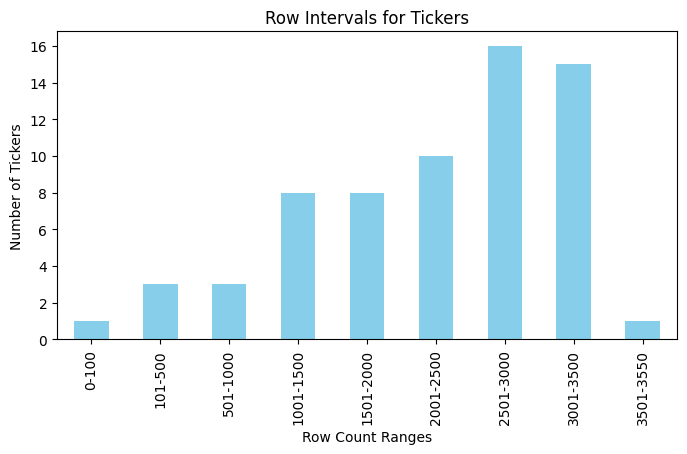

In [ ]:
# Group row counts into ranges
ranges = pd.cut(list(diff_val.keys()), bins=[0, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 3550], 
                labels=['0-100', '101-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-3550'])
grouped_data = pd.Series(diff_val.keys()).groupby(ranges, observed=False).size()

plt.figure(figsize=(8,4))
grouped_data.plot(kind='bar', color='skyblue')

plt.title('Row Intervals for Tickers')
plt.xlabel('Row Count Ranges')
plt.ylabel('Number of Tickers')
plt.show()


In [ ]:
_